# Data Mining

### Problem statement:
Collaborative filtering algorithms try to solve the prediction problem.
In other words, we are given a matrix of i users and j items. The value in the ith row and the jth column (denoted by rij) denotes the rating given by user i to item j.
Our job is to complete this matrix. In other words, we need to predict all the cells in the matrix that we have no data for.we will cover the following topics:

---Similarity measures:Given two items, how do we mathematically quantify how different or similar

---Dimensionality reduction: To improve performance, speed up calculations, and avoid the curse of dimensionality,it is often a good idea to reduce the number of dimensions.

---Supervised learning: Supervised learning is a class of machine learning algorithm that makes use of label data to infer a mapping function that can then be used to predict the label (or class) of unlabeled data.

---Clustering: Clustering is a type of unsupervised learning where the algorithm tries to divide all the data points into a certain number of clusters.

---Evaluation methods and metrics: The metrics include accuracy, precision, and recall.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Similarity Measures
Different similarity scores are appropriate in different scenarios. For cases where the magnitude is important, the Euclidean distance is an appropriate metric to use. However, as
we saw in the case described in the Pearson correlation subsection, magnitude is not as important to us as correlation.

### 1- Euclidean Score
Euclidean scores can take any value between 0 and infinity. The lower the Euclidean score (or distance), the more similar the two vectors are to each other.

In [12]:
#Function to compute Euclidean Distance. 
def euclidean(v1, v2):
    
    #Convert 1-D Python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    #Compute vector which is the element wise square of the difference
    diff = np.power(np.array(v1)- np.array(v2), 2)
    
    #Perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    
    #Compute square root and return final Euclidean score
    euclid_score = np.sqrt(sigma_val)
    
    return euclid_score

In [13]:
#Define 3 users with ratings for 5 movies
u1 = [5,1,2,4,5]
u2 = [1,5,4,2,1]
u3 = [5,2,2,4,4]

In [14]:
euclidean(u1, u2)# u1, u2 are so simillar

7.483314773547883

In [15]:
euclidean(u1, u3)

1.4142135623730951

In [ ]:
### 2- Pearson Correlation

In [ ]:
alice = [1,1,3,2,4]
bob = [2,2,4,3,5]

euclidean(alice, bob)

In [ ]:
eve = [5,5,3,4,2]

euclidean(eve, alice)

In [ ]:
from scipy.stats import pearsonr

pearsonr(alice, bob)

In [ ]:
pearsonr(alice, eve)

### 3- Cosine similarity
The cosine similarity score computes the cosine of the angle
between two vectors in an n-dimensional space. When the
cosine score is 1 (or angle is 0), the vectors are exactly similar.
On the other hand, a cosine score of -1 (or angle 180 degrees)
denotes that the two vectors are exactly dissimilar to each
other.

# Dimensionality reduction
Most machine learning algorithms tend to perform poorly as the number of dimensions in the data increases. There are two ways to achieve this:

---Feature selection: Involves identifying a subset of features that is most important for that particular use case.

---Feature extraction: Feature extraction takes in mdimensional data and transforms it into an ndimensional output space (usually where m >> n).

### 1- Principal component analysis
Principal component analysis is an unsupervised feature extraction algorithm that takes in m-dimensional input to create a set of n (m >> n) linearly uncorrelated variables (called
principal components) in such a way that the n dimensions lose as little variance (or information) as possible due to the loss of the (m-n) dimensions.

In [2]:
# Load the Iris dataset into Pandas DataFrame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal_length','sepal_width','petal_length','petal_width','class'])

#Display the head of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Import Standard Scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

#Separate the features and the class
X = iris.drop('class', axis=1)
y = iris['class']

# Scale the features of X
X = pd.DataFrame(StandardScaler().fit_transform(X), 
                 columns = ['sepal_length','sepal_width','petal_length','petal_width'])

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [4]:
#Import PCA
from sklearn.decomposition import PCA

#Intialize a PCA object to transform into the 2D Space.
pca = PCA(n_components=2)

#Apply PCA
pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(data = pca_iris, columns = ['PC1', 'PC2'])

pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [5]:
# It gives us information about the ratio of variance contained by each principal component:
#We see that the first principal component holds about 72.8% of the information, 
#whereas the second principal component holds about 23.3%.
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [7]:
#Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis = 1)

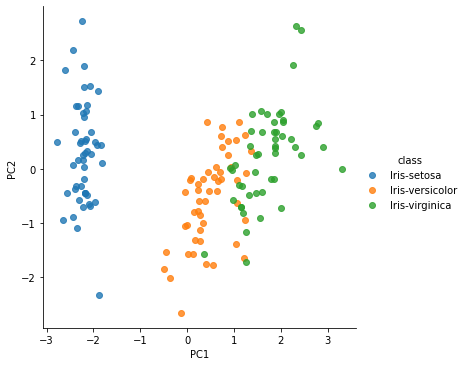

In [8]:
#Display the scatterplot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)

### 2- Linear-discriminant analysis
unlike PCA, which tries to retain the maximum information, LDA aims to identify a set of n features that result in the maximum separation (or discrimination) of classes.
Since LDA requires labeled data in order to determine its components, it is a type of supervised learning algorithm

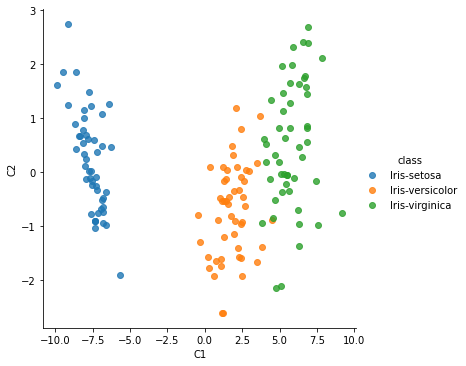

In [9]:
#Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Define the LDA Object to have two components
lda = LinearDiscriminantAnalysis(n_components = 2)

#Apply LDA
lda_iris = lda.fit_transform(X, y)
lda_iris = pd.DataFrame(data = lda_iris, columns = ['C1', 'C2'])

#Concatenate the class variable
lda_iris = pd.concat([lda_iris, y], axis = 1)

#Display the scatterplot
sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False)

### 3-Singular value decomposition(SVD)
Singular value decomposition, or SVD, is a type of matrix analysis technique that allows us to represent a highdimensional matrix in a lower dimension. SVD achieves this by identifying and removing the less important parts of the matrix and producing an approximation in the desired number of dimensions.

# Supervised Learning

### Gradient Boosting

In [10]:
#Divide the dataset into the feature dataframe and the target class series.
X, y = iris.drop('class', axis=1), iris['class']

#Split the data into training and test datasets. 
#We will train on 75% of the data and assess our performance on 25% of the data

#Import the splitting funnction
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Apply Gradient Boosting to the training data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

#Compute the accuracy on the test set
gbc.score(X_test, y_test)

0.9736842105263158

<AxesSubplot:>

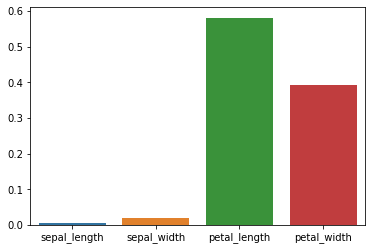

In [11]:
#Display a bar plot of feature importances
sns.barplot(x= ['sepal_length','sepal_width','petal_length','petal_width'], y=gbc.feature_importances_)

# Evaluation metrics